# Fourth Assignement on DecisionTrees 

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('New_Churn_data.csv', index_col=None)
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No,29.850000,1.000000
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No,55.573529,0.030140
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes,54.075000,0.497920
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No,40.905556,0.022980
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes,75.825000,0.466205
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No,82.937500,0.042602
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No,102.262500,0.014016
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No,31.495455,0.085438
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes,76.650000,0.242661


# Creating Features and Targets and also Train and Test Sets

In [4]:
features = df.drop(['Churn','customerID'], axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [5]:
x_train.dtypes

tenure                             int64
PhoneService                      object
Contract                          object
PaymentMethod                     object
MonthlyCharges                   float64
TotalCharges                     float64
Average_Monthly_Charges_ratio    float64
Monthly_Charges_ratio            float64
dtype: object

In [6]:
df.isnull().sum()

customerID                        0
tenure                            0
PhoneService                      0
Contract                          0
PaymentMethod                     0
MonthlyCharges                    0
TotalCharges                     11
Churn                             0
Average_Monthly_Charges_ratio    11
Monthly_Charges_ratio            11
dtype: int64

# Found Missing values in the dataframe so can can do mean of the values

In [7]:
df=df.fillna(df['TotalCharges'].mean())
df=df.fillna(df['Average_Monthly_Charges_ratio'].mean())
df=df.fillna(df['Monthly_Charges_ratio'].mean())

In [8]:
df.isnull().sum()

customerID                       0
tenure                           0
PhoneService                     0
Contract                         0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     0
Churn                            0
Average_Monthly_Charges_ratio    0
Monthly_Charges_ratio            0
dtype: int64

# Converting Categorical values to Numeric data so that we can get rid of value error. 

In [9]:
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes': 1})
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'Two year': 1,'One year':2})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


In [10]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
0,7590-VHVEG,1,0,0,0,29.85,29.85,0,29.850000,1.000000
1,5575-GNVDE,34,1,2,1,56.95,1889.50,0,55.573529,0.030140
2,3668-QPYBK,2,1,0,1,53.85,108.15,1,54.075000,0.497920
3,7795-CFOCW,45,0,2,2,42.30,1840.75,0,40.905556,0.022980
4,9237-HQITU,2,1,0,0,70.70,151.65,1,75.825000,0.466205
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,2,1,84.80,1990.50,0,82.937500,0.042602
7039,2234-XADUH,72,1,2,3,103.20,7362.90,0,102.262500,0.014016
7040,4801-JZAZL,11,0,0,0,29.60,346.45,0,31.495455,0.085438
7041,8361-LTMKD,4,1,0,1,74.40,306.60,1,76.650000,0.242661


In [11]:
features = df.drop(['Churn','customerID'], axis=1)


In [12]:
x_train

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
6661,72,No,Two year,Credit card (automatic),53.65,3784.00,52.555556,0.014178
4811,4,Yes,Month-to-month,Mailed check,46.00,193.60,48.400000,0.237603
2193,56,Yes,One year,Mailed check,21.20,1238.65,22.118750,0.017115
1904,56,Yes,Month-to-month,Electronic check,94.45,5124.60,91.510714,0.018431
6667,9,Yes,Month-to-month,Electronic check,79.55,723.40,80.377778,0.109967
...,...,...,...,...,...,...,...,...
4250,63,Yes,One year,Credit card (automatic),104.50,6590.80,104.615873,0.015855
1488,1,Yes,Month-to-month,Mailed check,51.25,51.25,51.250000,1.000000
6303,71,Yes,Two year,Electronic check,109.25,7707.70,108.559155,0.014174
2710,24,Yes,One year,Credit card (automatic),20.40,482.80,20.116667,0.042254


# Using labelEncoder converting the values to Numeric form.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in x_train.columns:
    if x_train[column].dtype == 'object':
        x_train[column] = label_encoder.fit_transform(x_train[column])
        x_test[column] = label_encoder.transform(x_test[column])



# In here we tried to Fit a decision tree to the data

In [14]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.829420673987126
0.7722884724588303


As we can see we found out 44 depth in the data

In [16]:
dt.get_depth()

44

# Plotting the Decision Tree 

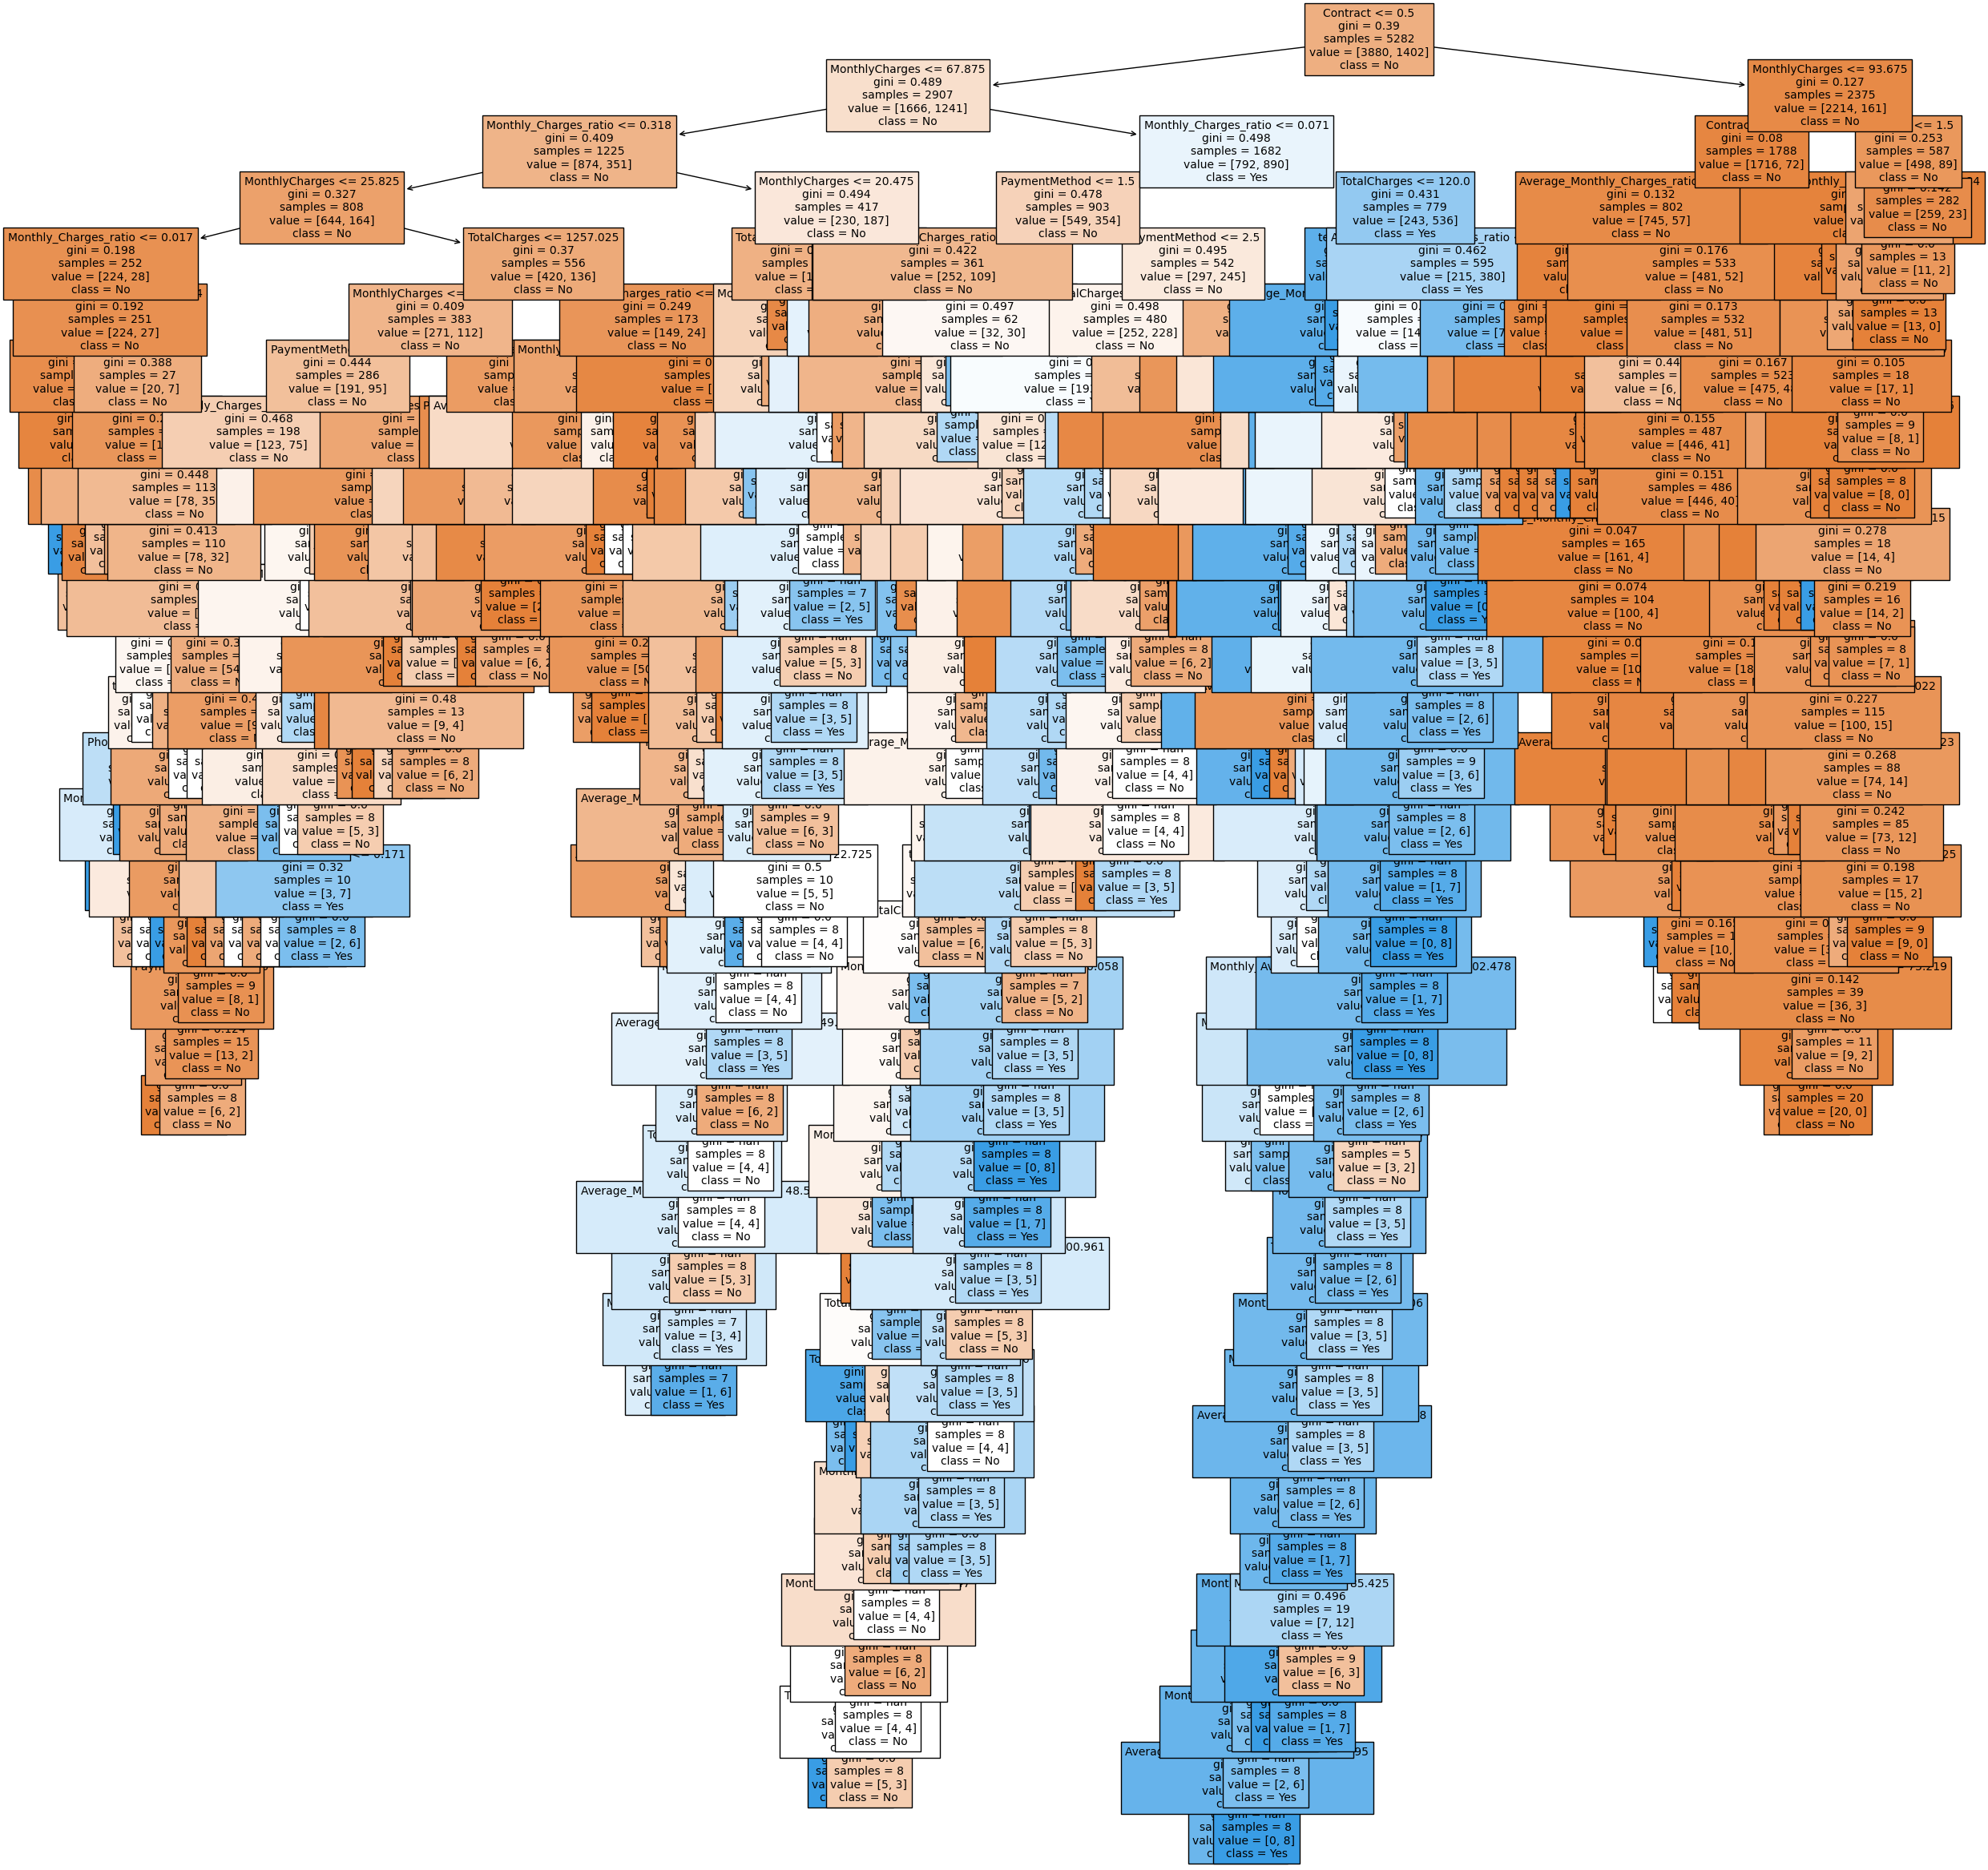

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'dt' is your DecisionTreeClassifier model
dt.fit(x_train, y_train)

# Convert Index to list for feature_names
feature_names_list = list(x_train.columns)

# Plot the decision tree
plt.figure(figsize=(30, 30))
plot_tree(dt, fontsize=10,feature_names=feature_names_list, class_names=['No', 'Yes'],filled=True)
plt.show()


# Changed the max depth of the decision tree to improve the model and we can see the scores they are close.

In [19]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7531238167360849
0.7444633730834753


# Plotting the decision tree with Features * Columns

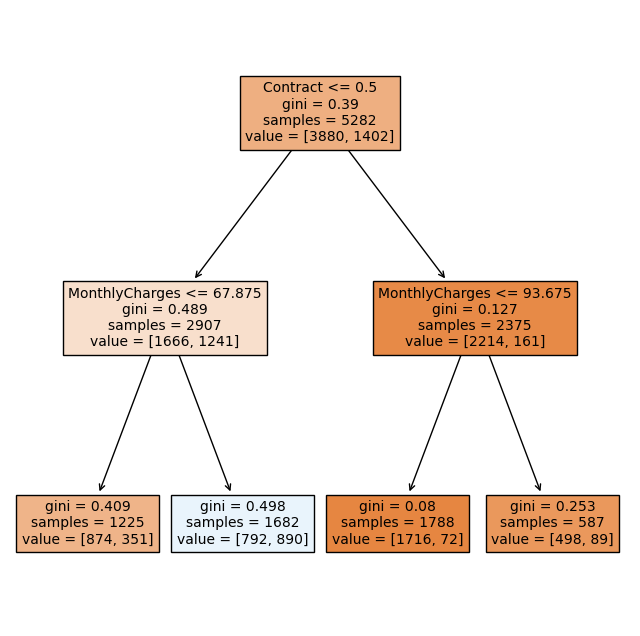

In [20]:
f = plt.figure(figsize=(8, 8))
_ = plot_tree(dt, fontsize=10, feature_names=features.columns.tolist(), filled=True)


# Random Forest Model 
Even used simple imputer method because there were some missing values and also NaN values in the data frame
I did fit the values using random forest classifier and printed out the scores of features & targets.

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_imputed, y_train)

# Evaluate the model
accuracy = rfc.score(X_test_imputed, y_test)
print(f"Accuracy: {accuracy}")
print(rfc.score(X_train_imputed, y_train))
print(rfc.score(X_test_imputed, y_test))


Accuracy: 0.7764371894960965
0.9943201987930422
0.7764371894960965


# Changed the max depth so that we can get accuracy which is same.

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(X_train_imputed, y_train)

print(rfc.score(X_train_imputed, y_train))
print(rfc.score(X_test_imputed, y_test))

0.7760028399006035
0.7849538679914834


In [23]:
x_train.isna().sum()

tenure                           0
PhoneService                     0
Contract                         0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     8
Average_Monthly_Charges_ratio    8
Monthly_Charges_ratio            8
dtype: int64

In [28]:
x_train=x_train.fillna(df['TotalCharges'].mean())
x_train=x_train.fillna(df['Average_Monthly_Charges_ratio'].mean())
x_train=x_train.fillna(df['Monthly_Charges_ratio'].mean())

In [29]:
x_test.isna().sum()

tenure                           0
PhoneService                     0
Contract                         0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     0
Average_Monthly_Charges_ratio    0
Monthly_Charges_ratio            0
dtype: int64

# Found some missing values in features so used mean method

In [30]:
x_test=x_test.fillna(df['TotalCharges'].mean())

In [31]:
x_test.isna().sum()

tenure                           0
PhoneService                     0
Contract                         0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     0
Average_Monthly_Charges_ratio    0
Monthly_Charges_ratio            0
dtype: int64

In [25]:
df


,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,29.85,29.85,0
1,5575-GNVDE,34,1,2,1,56.95,1889.50,0
2,3668-QPYBK,2,1,0,1,53.85,108.15,1
3,7795-CFOCW,45,0,2,2,42.30,1840.75,0
4,9237-HQITU,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,2,1,84.80,1990.50,0
7039,2234-XADUH,72,1,2,3,103.20,7362.90,0
7040,4801-JZAZL,11,0,0,0,29.60,346.45,0
7041,8361-LTMKD,4,1,0,1,74.40,306.60,1


# Removed the customerID column from the dataframe as it not required and also was hard to convert those values.

In [32]:
del df['customerID']

In [33]:
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Average_Monthly_Charges_ratio,Monthly_Charges_ratio
0,1,0,0,0,29.85,29.85,0,29.850000,1.000000
1,34,1,2,1,56.95,1889.50,0,55.573529,0.030140
2,2,1,0,1,53.85,108.15,1,54.075000,0.497920
3,45,0,2,2,42.30,1840.75,0,40.905556,0.022980
4,2,1,0,0,70.70,151.65,1,75.825000,0.466205
...,...,...,...,...,...,...,...,...,...
7038,24,1,2,1,84.80,1990.50,0,82.937500,0.042602
7039,72,1,2,3,103.20,7362.90,0,102.262500,0.014016
7040,11,0,0,0,29.60,346.45,0,31.495455,0.085438
7041,4,1,0,1,74.40,306.60,1,76.650000,0.242661


# I did Plot the correlations between features and targets

<Axes: >

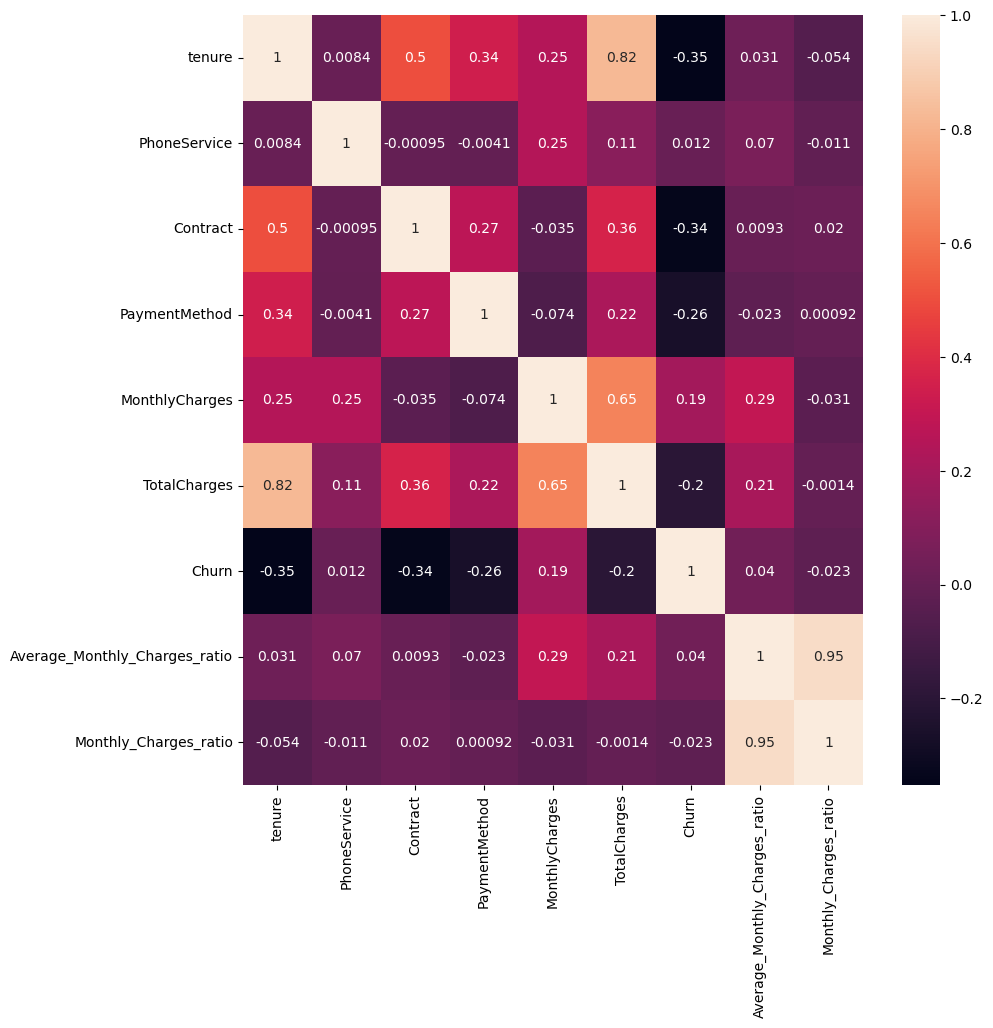

In [34]:
import seaborn as sns

f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

# I did plot the feature importances from random forest

<Axes: title={'center': 'Feature Importance'}>

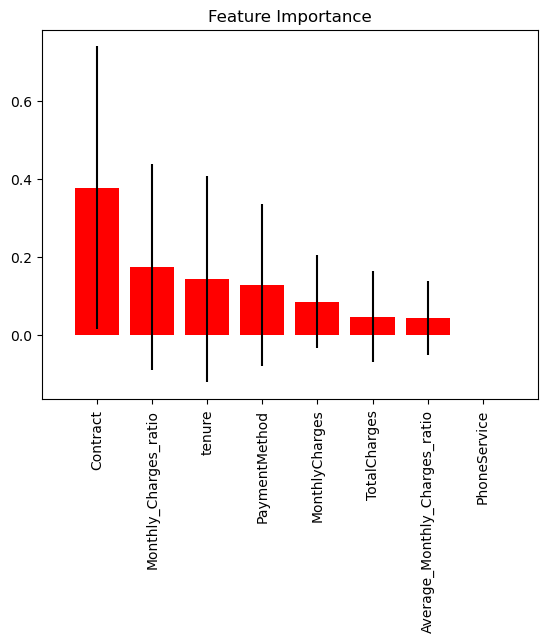

In [35]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

We can see here the contract seems to be the most important variable,with a sharp dropoff in importance after that.

# I did refit a random forest model after removing some less important features and we can observe the changes in performance and the important features.

In [36]:
new_features = features.drop(['PhoneService'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=42)

# As we can see the scores are close when the max depth is set to 2, it's like two layers.

In [37]:
rfc = RandomForestClassifier(max_depth=2, max_features=7, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.7544490723210905
0.7518455423055083


<Axes: title={'center': 'Feature Importance'}>

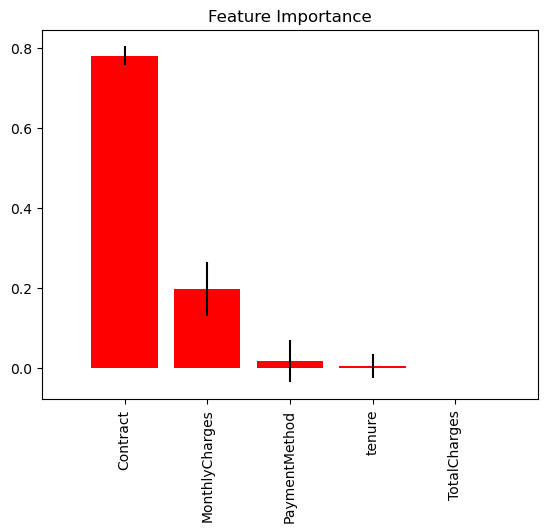

In [32]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

Our Feature importance is Contract we can observe the changes.
As we can see the Contract measurement seems to be very important for predicting the customer churn.

# Summary
Using biographical and telecom customer data, we were able to effectively model the occurrence of customer churn data using a machine learning model. The data was cleaned just minimally: we changed category string columns to numeric values and removed the 'Churn' column since it had little bearing on the goal. Higher contract rates typically indicate the occurrence of customer turnover, according to the Phi-k correlation, which showed that the contract measurement had the strongest link to the aim. We cleaned the data by eliminating the missing and NaN values by mean(). We obtained 77% accuracy on the test data compared with an 83% majority class fraction by fitting a random forest model to the data. The model appears promising thus far,
Our Feature importance is Contract we can observe the changes and by removing the less important features from the dataset.
As we can see the Contract measurement seems to be very important for predicting the customer churn.
